# Wine Quality Prediction using Machine Learning
#### Final Project by Anastasia Taucci


### Goal
The goal of this project is to build a machine learning model that predicts the **quality score of red wine (from 3 to 9)** based on its **chemical properties**, such as acidity, sugar content, pH, and alcohol level.

Even though the score is a number, it represents a **category**, not a continuous value. Therefore, this is a **multi-class classification problem**.

### Why This Project?
Wine quality is typically judged by human experts, which can be time-consuming and subjective. With machine learning, we can automate this process, making it **faster, more consistent, and data-driven**.

By completing this project, we can:
- Understand which chemical features influence wine quality
- Build a tool to predict wine quality based on measurable properties
- Compare the performance of different machine learning models

### Dataset Overview
We use a **balanced version** of the UCI Wine Quality dataset from Kaggle.

🔗 [Link to dataset on Kaggle](https://www.kaggle.com/datasets/taweilo/wine-quality-dataset-balanced-classification)

- **Samples**: 21,000 red wine entries  
- **Target variable**: `quality` (integer scores from 3 to 9)  
- **Features**: 11 numerical attributes such as:
  - fixed_acidity, volatile_acidity, citric_acid
  - residual_sugar, chlorides, pH, alcohol, etc.

---

### Why I Chose the Balanced Wine Dataset
The original dataset has an imbalanced distribution — most wines are rated 5 or 6, and very few are rated 3 or 8. This makes it harder for a model to learn about rare quality levels.

To solve this, I used a **balanced version** where all classes have equal representation. This improves:
- Model fairness and learning
- Accuracy comparisons between classes
- Simpler evaluation without rebalancing steps


## Import libraries

In [18]:
import pandas as pd  # for loading and working with data
import matplotlib.pyplot as plt  # for creating plots
import seaborn as sns  # for nicer-looking visualizations
from sklearn.model_selection import train_test_split  # to split data into training and testing sets
from sklearn.linear_model import LogisticRegression  # machine learning model for classification
from sklearn.tree import DecisionTreeClassifier  # tree-based model for classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
# to evaluate model performance

## Import data

In [2]:
# Load dataset
df = pd.read_csv("wine_data.csv")

# Show first and last rows
print('first rows')
print(df.head())

print()
print()
print('last rows')
print(df.tail())

first rows
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0           11.6             0.580         0.66            2.20      0.074   
1           10.4             0.610         0.49            2.10      0.200   
2            7.4             1.185         0.00            4.25      0.097   
3           10.4             0.440         0.42            1.50      0.145   
4            8.3             1.020         0.02            3.40      0.084   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 10.0                  47.0  1.00080  3.25       0.57   
1                  5.0                  16.0  0.99940  3.16       0.63   
2                  5.0                  14.0  0.99660  3.63       0.54   
3                 34.0                  48.0  0.99832  3.38       0.86   
4                  6.0                  11.0  0.99892  3.48       0.49   

   alcohol  quality  
0      9.0        3  
1      8.4        3  
2     10.

# 1. Data Exploration:

Understanding the dataset and key features.

In [3]:
# Show basic information about the dataset
df.info()

# Summary statistics of all columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
# Checking for missing values to ensure the dataset is clean before preprocessing
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Check distribution of the target variable 'quality'
print("Value counts of wine quality:")
print(df['quality'].value_counts().sort_index())

Value counts of wine quality:
quality
3    3000
4    3000
5    3000
6    3000
7    3000
8    3000
9    3000
Name: count, dtype: int64


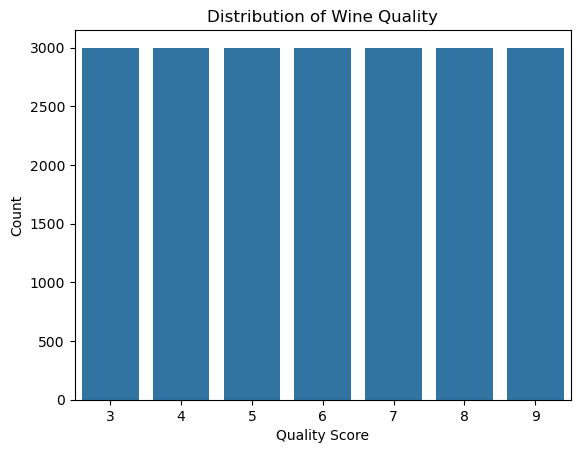

In [6]:
# Plot the distribution of wine quality classes
sns.countplot(x='quality', data=df)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

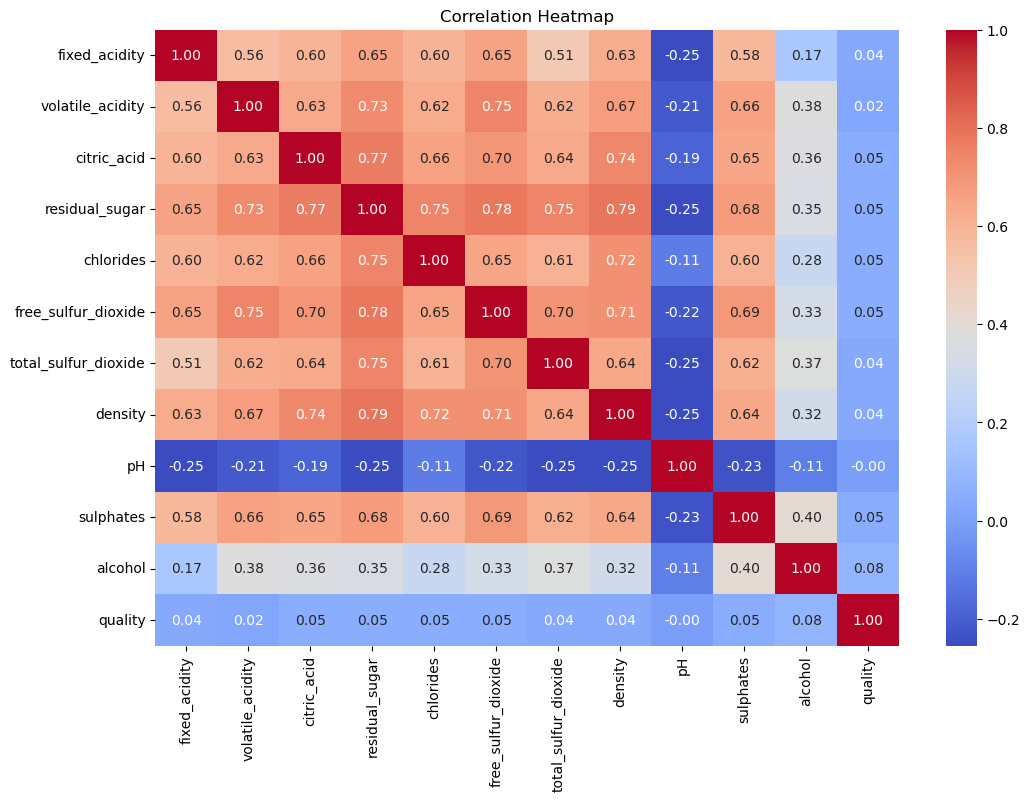

In [7]:
# Show a correlation heatmap between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#### Observations from Correlation Heatmap

There is **no strong individual correlation** between any one feature and wine quality.

That doesn't mean the features are useless — it just means:

- Wine quality likely depends on **combinations of features**, not just one.
- Machine learning models (like **decision trees** or **logistic regression**) can still learn complex patterns that humans can’t easily see through simple correlation.

This supports our choice to use machine learning for this project.


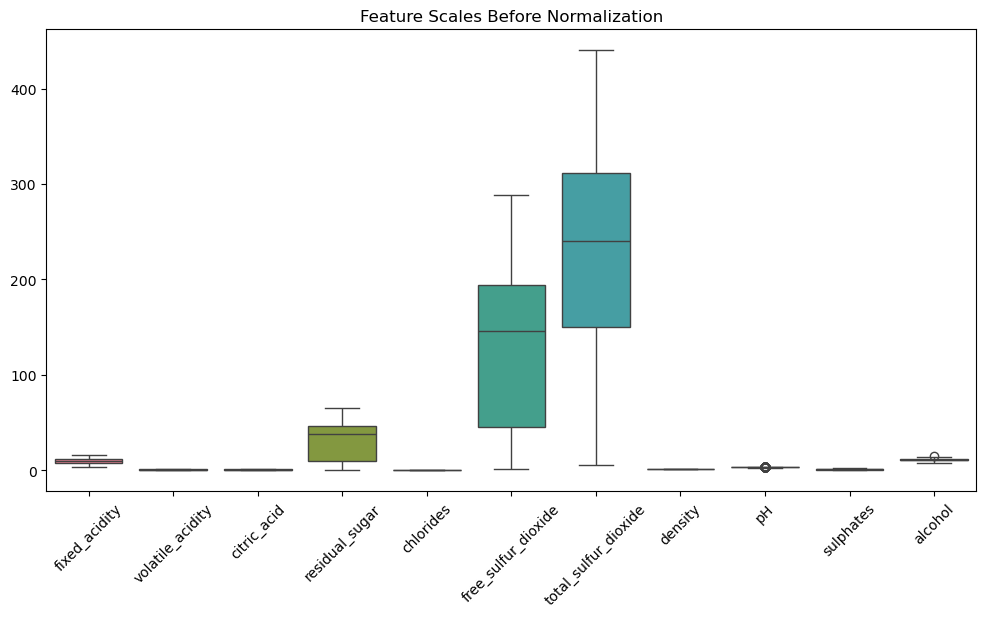

In [21]:
# Plot boxplot to visualize feature value ranges
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('quality', axis=1))
plt.title("Feature Scales Before Normalization")
plt.xticks(rotation=45)
plt.show()

#### Observations from Boxplot
These plots show how features have different value ranges.

# 2. Data Pre-processing

#### For this data set, no data cleaning is needed because: 
- The dataset has **no missing values** (we checked earlier)
- All features are **numerical** and **properly formatted**
- The dataset is already **balanced** across wine quality classes, which helps prevent the model from being biased toward any one quality score.
- All features are equally **relevant and informative** — no need to drop any columns
#### So we can proceed directly to normalization and splitting.

In [8]:
# Separate the features (X) and the target variable (y)
X = df.drop('quality', axis=1)  # All columns except 'quality'
y = df['quality']               # Target variable

#### Normalize the features so they are on the same scale.
This is important because features like alcohol (8–14), pH (2.9–3.9), and sulphates (0.3–2.0) have very different ranges (also seen in boxplots).
Without normalization, models like Logistic Regression may give more weight to features with bigger numbers, even if they aren't more important.

In [9]:
# Normalize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform in one step

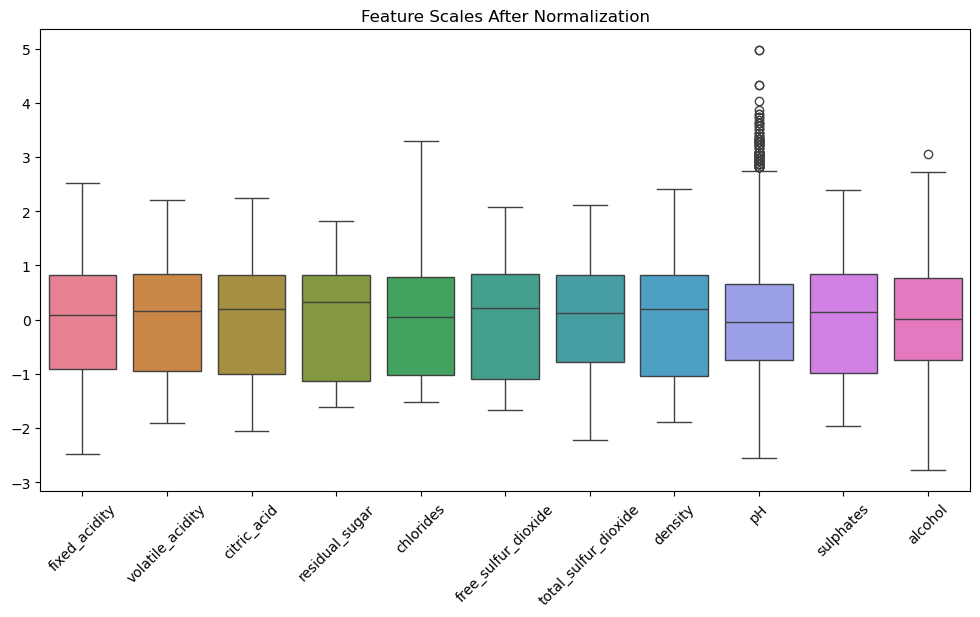

In [22]:
# Plot boxplot to show feature scales after normalization

# Create a DataFrame from the scaled values
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Boxplot after normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df)
plt.title("Feature Scales After Normalization")
plt.xticks(rotation=45)
plt.show()


In [10]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Print the shape of training and testing sets, to show how many rows and columns are in each dataset 
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (16800, 11)
Testing set shape: (4200, 11)


# 3. Modeling

Implementing and evaluating machine learning model - **Logistic Regression**

In [12]:
# Create the Logistic Regression model and train it
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

Implementing and evaluating machine learning model - **Decision Tree**

In [14]:
# Create and train the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Make predictions on the test set
y_pred_dtree = dtree.predict(X_test)

# 4. Evaluation

### Evaluate the performance of the **Logistic Regression** model.

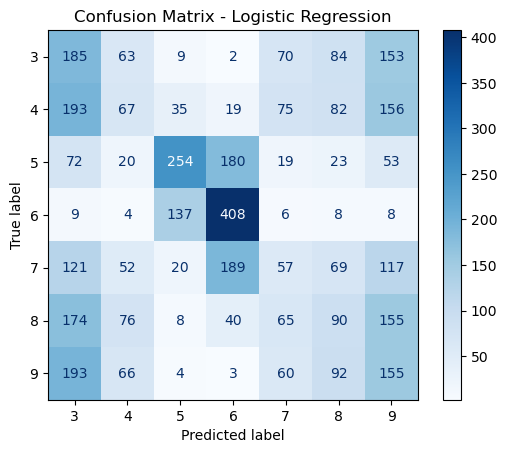

Accuracy: 0.29
Classification Report:
              precision    recall  f1-score   support

           3       0.20      0.33      0.24       566
           4       0.19      0.11      0.14       627
           5       0.54      0.41      0.47       621
           6       0.49      0.70      0.57       580
           7       0.16      0.09      0.12       625
           8       0.20      0.15      0.17       608
           9       0.19      0.27      0.23       573

    accuracy                           0.29      4200
   macro avg       0.28      0.29      0.28      4200
weighted avg       0.28      0.29      0.27      4200



In [16]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Create display object with correct class labels (3–9)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

# Plot the confusion matrix
cm_display.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report for multiple classes
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))


### Evaluate the performance of the **Decision Tree** model.

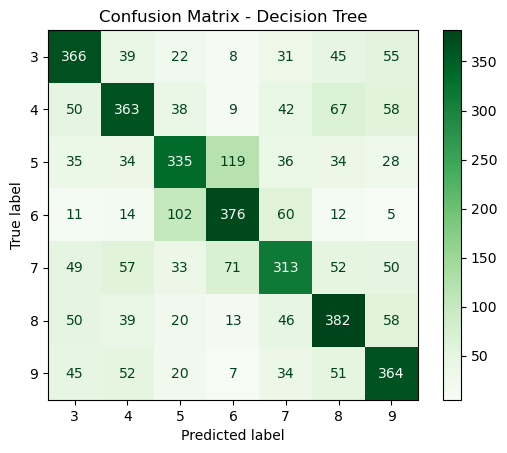

Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

           3       0.60      0.65      0.62       566
           4       0.61      0.58      0.59       627
           5       0.59      0.54      0.56       621
           6       0.62      0.65      0.64       580
           7       0.56      0.50      0.53       625
           8       0.59      0.63      0.61       608
           9       0.59      0.64      0.61       573

    accuracy                           0.59      4200
   macro avg       0.59      0.60      0.59      4200
weighted avg       0.59      0.59      0.59      4200



In [17]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_dtree)

# Create display object with correct class labels (3–9)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)

# Plot the confusion matrix
cm_display.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test, y_pred_dtree)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report for multiple classes
print("Classification Report:")
print(classification_report(y_test, y_pred_dtree))

# 5. Conclusion

We tested two machine learning models to predict wine quality (3 to 9):

**Logistic Regression** had low accuracy (29%).  
- This is because the model works best when there's a simple, straight-line relationship between features and the target — for example, "higher alcohol = higher quality."  
But wine quality depends on **multiple chemical features working together**, not just one. These patterns are more complex, and Logistic Regression can't capture them well.  
- It predicted class 5 and 6 fairly well, but did poorly on the others.

**Decision Tree** did much better, with 59% accuracy.  
- This model works better with **non-linear patterns** and can handle combinations of features.  
For example, it can learn rules like "if alcohol is high and acidity is low, then quality is 7."  
- The predictions were more balanced across all quality levels.

---

Even though 59% isn’t perfect, it’s reasonable for a 7-class prediction problem.  
This project shows that wine quality depends on **many interacting features**,, and a tree-based model is a better choice than linear models here.
